<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 28)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,025 (101.66 KB)

 Trainable params: 26,025 (101.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: 575.1205 - val_accuracy: 0.0000e+00 - val_loss: 532.4799
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 558.5358 - val_accuracy: 0.0000e+00 - val_loss: 389.4663
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 334.1641 - val_accuracy: 0.0000e+00 - val_loss: 116.2483
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 129.3428 - val_accuracy: 0.0000e+00 - val_loss: 68.0226
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 64.3405 - val_accuracy: 0.0000e+00 - val_loss: 56.7194
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 45.9218 - val_accuracy: 0.0000e+00 - val_loss: 40.6389
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 30.5191 - val_accuracy: 0.0000e+00 - val_loss: 32.0988
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

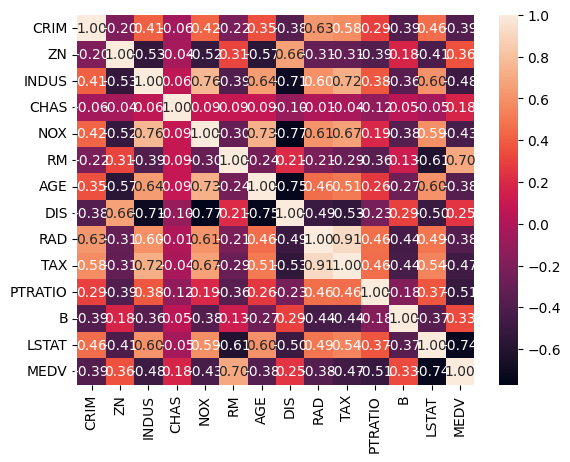

In [38]:
import pandas as pd
df = pd.read_csv('boston.csv')
df.head()
df.shape
df.info()
df.describe()
df.duplicated().sum()

import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt='.2f')

x = df.drop(columns=['MEDV'])
y = df['MEDV']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaled = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Input layer
model.add(Dense(128, activation='relu', input_shape=(13,)))
# Hidden layers
model.add(Dense(96, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(28, activation='relu'))
# Output layer
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=50,validation_split=0.2)

pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))